# In this assignment, you will implement linear regression with one variable.
### 100 points total

# [Shubharthak Sangharasha](https://shubharthaksangharsha.github.io)
# Student ID: `a1944839`

In [1]:
## DO NOT MODIFY

# The following line of code clears variables within an ipython environment
# It is simply a convenience for marking 
%reset_selective -f a

# Import relevant libraries 
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

## Load data from data.csv file (5 Points)
Complete the function below to load the data from "data.csv".

The function should **return** [X, y] where X is the input and y is the target

In [2]:
def load_data(file_name):
    data = loadtxt(file_name, delimiter=',', skiprows=1)
    X = data[:, 0] 
    y = data[:, 1]
    return X, y

The below line of code simply runs the function you should have written.

In [3]:
## DO NOT MODIFY

[X,y] = load_data("data.csv")

# Visualise the data (5 Points)

Complete the function 'vis_data'. This function should provide an overview of the data including a variety of useful plots.

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
def vis_data(X,y):
    #FOR LINEAR REGRESSION, I will use Scatter plot to get idea how my data points will look like 
    #So that I will draw the best fit line for it 
    plt.figure(figsize=(10,6))
    plt.subplot(2, 2, 1)
    plt.scatter(X, y, color='g', label='X vs y')
    plt.title('Scatter Plot of X vs y')
    plt.xlabel('X (input)')
    plt.ylabel('y (output)')
    plt.legend();
    
    #I will also plot an histogram of Y to understand how many times a value of Y occurs(frequency of Y)
    plt.subplot(2, 2, 3)
    plt.hist(y, bins=10, color='r', edgecolor='black')
    plt.title('Histogram of y')
    plt.xlabel('y (Output)')
    plt.ylabel('Frequency')
    #Tight the layout so that I can put the figure don't overlays 
    plt.tight_layout()
    plt.show();

The below line of code simply runs the function you should have written.

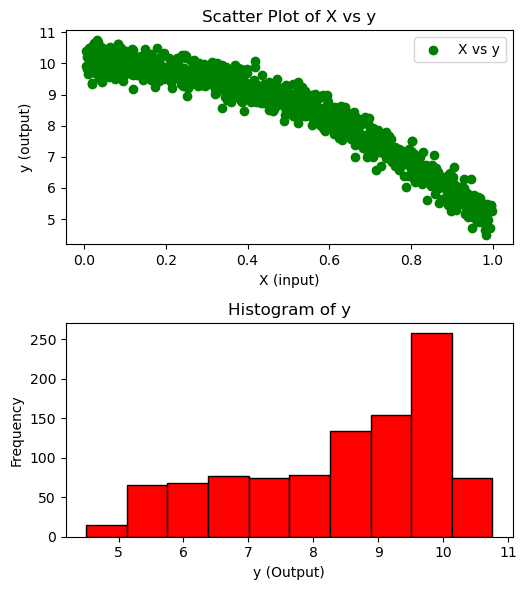

In [6]:
## DO NOT MODIFY

vis_data(X,y)

## Loss (10 Points)
Complete the function 'loss'. This function should calculate an appropriate loss when given the predicted and true values of 'y' (the variable being predicted).

In [7]:
# y_true --> the target values.
# y_pred --> the predicted values
def loss(y_true, y_pred):    
    #Calculating loss.
    #For loss function I am taking MSE(Mean square error) 
    #formula is (1 / m) * np.sum((y_pred - y_true) ** 2) (where y_true: target values, y_pred: predicted values and `m`: total length of true labels)
    m = len(y_true)
    loss = (1/ m) * np.sum((y_pred - y_true) ** 2)
    return loss

### Test loss function
Implement a test for your loss function to demonstrate it provides the correct answer when used. The **assert** keyword is helpful here.

In [8]:
loss(np.array([5, 2]), np.array([10, 3]))

13.0

## Calculating Gradients (20 Points)
Complete the 'gradients' function. This function should calculate the partial derivatives of linear regression. One for the weights (dw) and one for the bias term/constant term (db).

In [9]:
#Input:
# X --> Input.
# y_true --> target values.
# y_pred --> predictions.
#return:
# dw --> the gradient with respect to the weights
# db --> the gradient with respect to the bias.
def gradients(X, y_true, y_pred):
    # write your code here
    #first i will calculate the total number of true labels i.e `m`
    m = len(y_true)
    
    #Now calculate the `dw` which is nothing but partial differentiation of weights i.e: 
    '''
    dw= 1/m ∑(y(pred) - y (true))* X
    '''
    dw = (1 / m) * np.sum((y_pred - y_true) * X)

    
    #Now calculate the `db` which is nothing but partial differentiation of bias i.e:
    '''
    dw= 1/m ∑(y(pred) - y (true)) 
    '''
    db = (1 / m) * np.sum(y_pred - y_true)
    return dw, db

### Test gradients
Write tests to demonstrate that your gradient function produces the correct result. Please note that in 'computer land', the term 'equal' can be a bit problematic. Consider looking up **'assert_almost_equal'** in the numpy libraries.

In [10]:
dw,db = gradients(np.array([5]),np.array([1.5]),np.array([1.1]))
print(f'dw = {dw} , db = {db}')

dw = -1.9999999999999996 , db = -0.3999999999999999


## Training (25 Points)
Complete the 'train' function. The '...' should be changed for any additional arguments you believe the function should have (hint, it should have further arguments). It should return the weights and bias term for a linear regression model. Please note, you **must** use your previously implemented functions (rather than just copy-pasting the code).

In [11]:
def draw_loss(losses):
    #I am drawing the graph of Loss vs Iteration which will help me to visualize how loss is getting lower with iterations 
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(losses)), losses)
    plt.title('Loss vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

In [12]:
# X --> Input.
# y --> true/target value.
# add more arguments as you need
def train(X, y, learning_rate: float =0.01, epochs: int= 3000, print_values=True):
    '''
    X: Training data points 
    y: target values 
    learning_rate(alpha): the steps to take to reach the converge point 
    epochs: no. of iterations to held for model to complete the training 
    print_values: Draw and print the values and loss vs epochs graph 
    '''
    # write your code here
    m = len(y)
    w = 0
    b = 0 
    losses = []
    for i in range(epochs):
        #First I will calculate the loss function and append it to the `losses` list 
        y_pred = w * X + b #I will calculate the y_prediction 
        loss_calculation = loss(y, y_pred)
        losses.append(loss_calculation)
        
        #Now, I will try to compute the gradients i.e `dw` and `db` 
        dw, db = gradients(X, y, y_pred)
        #I will update the Weights and bias 
        w -= learning_rate * dw 
        b -= learning_rate * db 
        
        #I will also print the iterations after every 100 epochs of intervals.
        if print_values:
            if i%100 == 0:
                print(f"Epochs {i} Current loss: {loss_calculation}, Current weight: {w}, Current bias: {b}")

    
    # returning weights, bias and losses(List).
    if print_values:
        draw_loss(losses)
        print('last weight: ', w)
        print('last bias: ', b)
    return w, b, losses

Test your function on the provided data. Please comment on the success of the training and any notable features thereof in the markdown provided below.

Epochs 0 Current loss: 72.95871157185934, Current weight: 0.036921735429099385, Current bias: 0.08401616834980909
Epochs 100 Current loss: 10.856946579107603, Current weight: 1.888753152243708, Current bias: 4.9400114688043635
Epochs 200 Current loss: 5.30440745885274, Current weight: 2.0522380895226324, Current bias: 6.498130831413177
Epochs 300 Current loss: 4.327081705368934, Current weight: 1.7631080745147263, Current bias: 7.113840512579764
Epochs 400 Current loss: 3.7815663273194913, Current weight: 1.3683124645780695, Current bias: 7.452221335796319
Epochs 500 Current loss: 3.3297170989470444, Current weight: 0.9642543858956375, Current bias: 7.701591845127177
Epochs 600 Current loss: 2.93711779378138, Current weight: 0.576774354521646, Current bias: 7.915768186029095
Epochs 700 Current loss: 2.5944620159039586, Current weight: 0.2119016403373782, Current bias: 8.11058878445972
Epochs 800 Current loss: 2.2952734732227946, Current weight: -0.12983902130127786, Current bias: 8.291

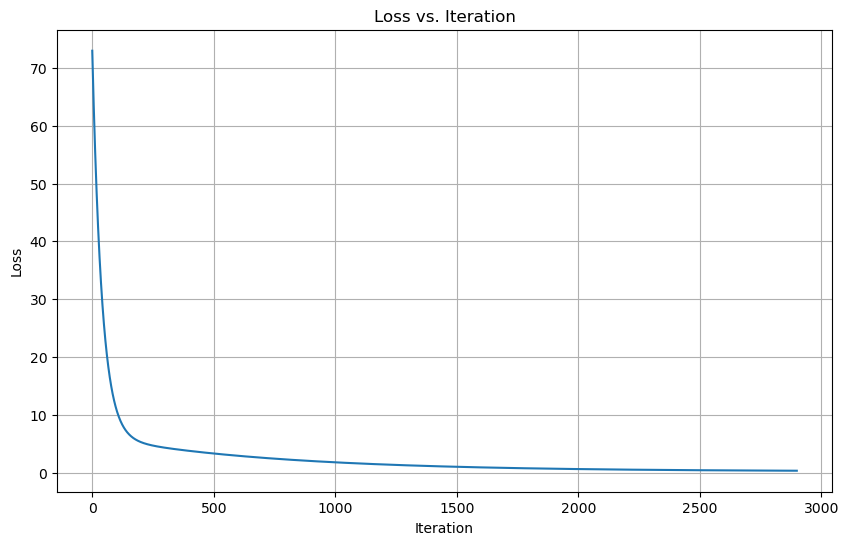

last weight:  -3.830860511766785
last bias:  10.237844256468964


In [13]:
#Trying with 1000 epochs and learning_rate as 0.01
w, b, _ = train(X, y,learning_rate= 0.01, epochs=2900, print_values=True)

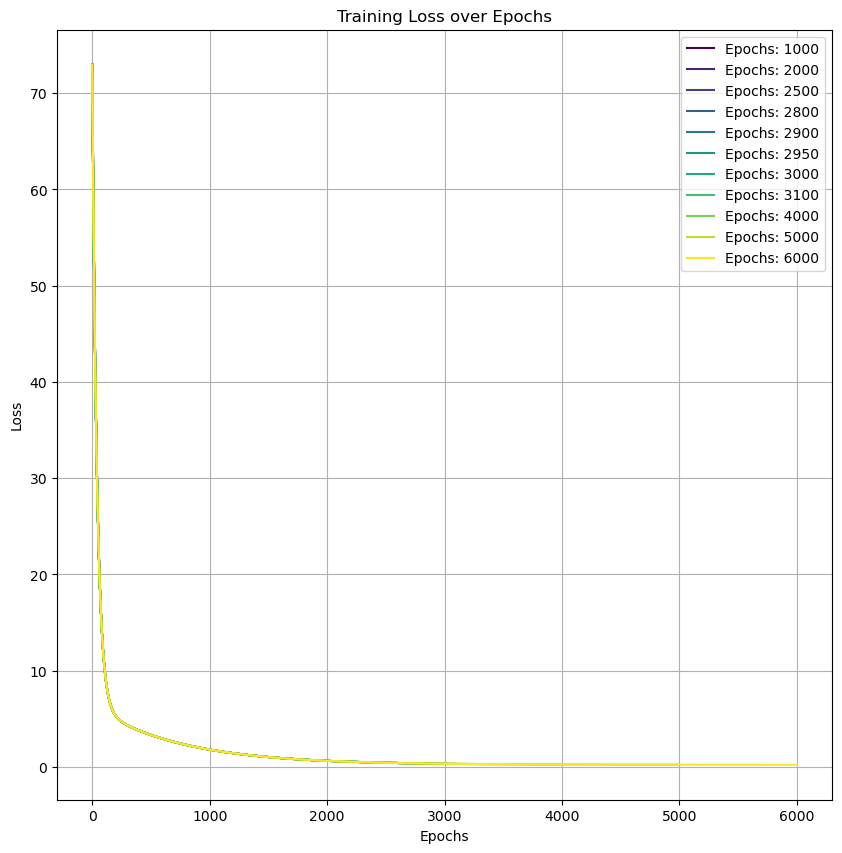

In [14]:
#lets try with different epochs 
epoch_values = [1000, 2000, 2500, 2800, 2900, 2950, 3000, 3100, 4000, 5000, 6000]
all_losses = {}
for epochs in epoch_values:
    _, _, losses = train(X, y, learning_rate=0.01, epochs=epochs, print_values=False)
    all_losses[epochs] = losses

plt.figure(figsize=(10, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(epoch_values))) 

for i, (epochs, losses) in enumerate(all_losses.items()):
    plt.plot(range(epochs), losses, label=f'Epochs: {epochs}', color=colors[i])

plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show();

### Write your observations here

#### 1. Loss Trend: The loss decreases over iterations, indicating that the model is learning and improving its predictions.
#### 2. Convergence: The rate of decrease in loss slows down as the number of iterations increases, suggesting the model is converging to an optimal solution.
#### 3. Learning Rate Impact: The learning rate of 0.01 seems appropriate as it allows for steady improvement without overshooting the optimal values.
#### 4. Epochs: 1000 epochs appear sufficient for this dataset, as the loss stabilizes towards the end of training. Although If I gradually increase the epochs, it will somehow compute the loss more better. After doing different sets of epoch, I found that 6000, is the best epoch value for my current training. 

## Prediction (15 Points)
Complete the 'predict' function. This function should provide a prediction of the target variable given input variables and appropriately determined weights and biases.

In [15]:
def predict(X, w, b):
    # write your code here
    y_pred = w * X + b
    # Returning predictions.
    return y_pred

In [16]:
predictions = predict(X, w, b)
print(predictions[:100])
print(f"Length of predictions: {len(predictions)}")

[ 8.80303331  6.59579036  7.43367757  7.94446711  9.64015861  9.64025101
 10.01533404  6.91964426  7.93505649  7.52531698 10.15898793  6.5222549
  7.04887262  9.42440274  9.54129817  9.53524716  9.07233466  8.22757556
  8.58312314  9.12218604  7.89392116  9.70346273  9.11867886  8.83436314
  8.49070376  7.22994467  9.47292185  8.26788385  7.96838668 10.0598992
  7.91042467  9.58459012  9.98864068  6.60279612  6.53864263  7.14098678
  9.0709114   9.86367601  7.61664297  8.55168145  9.7703328   8.34089059
 10.10610663  6.75436464  9.24649424  7.6998138   9.0437226   8.24553621
  8.14347344  9.52969262  6.52350079  7.26841853  6.63875486  6.80988549
  7.94737284  6.70627265  9.89884182  9.48706125 10.06458482  8.99154914
  8.74887578  9.19834397  7.06306646  8.87117202  9.16162334  8.15885126
  9.69798321  7.16473952  9.95225114  6.45721806  7.27948226  9.4765922
 10.2166898   7.11392527  7.52997237  7.44511948  7.28321514  9.95418952
  8.86461205  9.79396605  6.93141542  7.85007608  8.97

### Visualise your predictions
The code below will produce a visualisation of the real data and your model prediction. The two should bear some resemblance. If they look very different, you have probably made an error.

In [17]:
#Importing miniconda packages so that i can import sickit packages in my python [Ignore this cell]
import sys 
sys.path.append('/home/shubharthak/miniconda3/lib/python3.12/site-packages')
print(sys.path)

['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/home/shubharthak/miniconda3/lib/python3.12/site-packages']


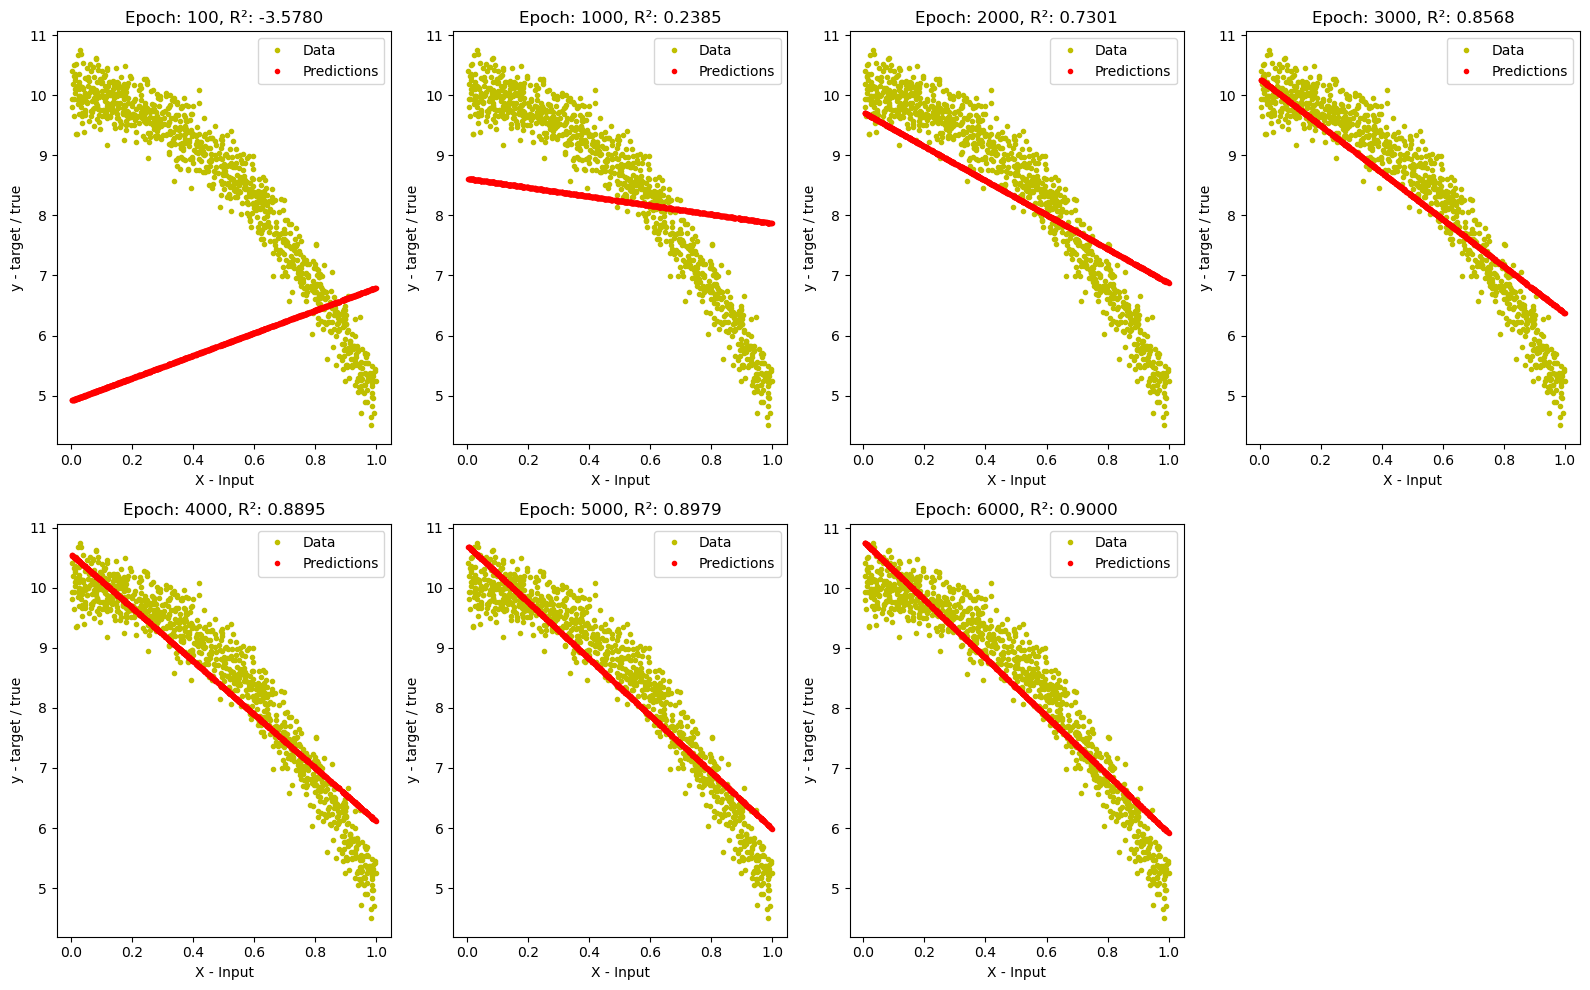

In [18]:
#For my reference I am trying to see which r2_score value comes great 
from sklearn.metrics import r2_score

epoch_values = [100, 1000, 2000, 3000, 4000, 5000, 6000]
result =  {}

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10)) 
axes = axes.ravel() 

for i, epoch in enumerate(epoch_values):
    w, b, _ = train(X, y, learning_rate=0.01, epochs=epoch, print_values=False)
    y_true = y
    y_pred = predict(X, w, b)  # <- Update this function signature as needed
    axes[i].plot(X, y, 'y.')
    axes[i].plot(X, y_pred, 'r.')
    axes[i].set_title(f'Epoch: {epoch}, R²: {r2_score(y_true, y_pred):.4f}')
    result[r2_score(y_true, y_pred)] = epoch
    axes[i].legend(["Data", "Predictions"])
    axes[i].set_xlabel('X - Input')
    axes[i].set_ylabel('y - target / true')

if len(epoch_values) < len(axes):
    for j in range(len(epoch_values), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
w, b, _ = train(X, y, learning_rate=0.01, epochs=result[max(result.keys())], print_values=False) #choose the maximum r2_score value 

Text(0.5, 1.0, 'Regression')

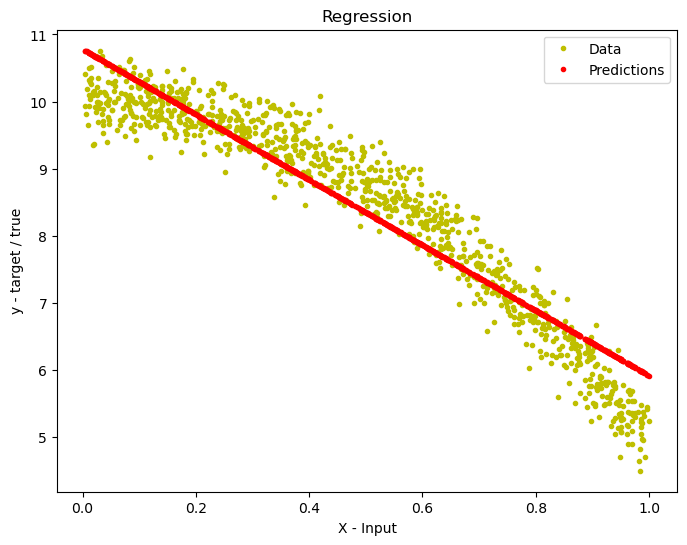

In [19]:
## DO NOT MODIFY

fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b), 'r.')  ## <- Update this function signature as needed 
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')

### Calculate the fit score
The code below will calculate some useful metrics.

In [20]:
## DO NOT MODIFY

from sklearn.metrics import r2_score
y_true = y
y_pred = predict(X, w, b) ## <- Update this function signature as needed 
r2_score(y_true, y_pred)

0.9000408370214179

### Use scikit-learn to fit a linear regression model using the data from data,csv (20 points)
Now you have manually implemented linear regression, do it the easier way using scikit-learn. Consider the following things:
* Loading data
* Data description
* Training and applying models
* Evaluation metrics
* Informative and comprehensive visualisations

In [27]:
#import libraries 
import pandas as pd 

#Load the data we can use pandas for that 
df = pd.read_csv('data.csv')
print(df.head())

print('Shape of data:', df.shape)

print(df.info())

print(df.describe())


          X          y
0  0.374540   9.351909
1  0.950714   5.080108
2  0.731994   7.434984
3  0.598658   8.391216
4  0.156019  10.046228
Shape of data: (1000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None
                 X            y
count  1000.000000  1000.000000
mean      0.490257     8.401617
std       0.292137     1.540753
min       0.004632     4.502961
25%       0.235973     7.185142
50%       0.496807     8.818584
75%       0.744320     9.696268
max       0.999718    10.753141


In [22]:
#Lets split the data for 80% training and 20% testing - just for fun :-P
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred)

[ 8.95424606  6.75260797  8.54096611  9.07953095  6.07822101  5.98014991
  8.54169914  6.5026638  10.5468637   8.25743771  6.63993277  6.98165614
  8.1875716   9.79279482 10.28389292 10.44681473  6.3816875  10.35282856
  9.30375636  9.61441098  6.97636037  7.61882786 10.78681485  9.49736227
  8.10613471  7.22833496  7.66310421  7.4003884   9.9620955   6.33109023
  7.66975781  5.96846914  9.82104646  5.89556102 10.369658    6.39643681
  9.4641538   7.67831152 10.74482246  9.23499373  8.75864821  8.23751772
 10.75079239 10.72132128 10.44762859  7.59461819  8.73028345  9.47117119
 10.46783397  9.0477113   8.28169787  9.75726318  5.87614179  8.39222326
  9.02766125  7.80896206  9.47982543 10.77487627  8.00722306  6.82206654
  6.98810779  7.85769766  9.72355638 10.0663258  10.26931607  8.31393155
  7.81790604 10.09445995  6.97673238  7.48478225  7.0610854   9.9283125
 10.17739531  9.35602564  6.72228426  7.89340583  7.91357815  8.65479665
 10.11132462  9.24698885  6.50547713 10.16679889  8.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#I am calculating for the metric evaluation 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2_Score: {r2:.2f}")


Mean Absolute Error: 0.38
Mean Squared Error: 0.22
R2_Score: 0.90


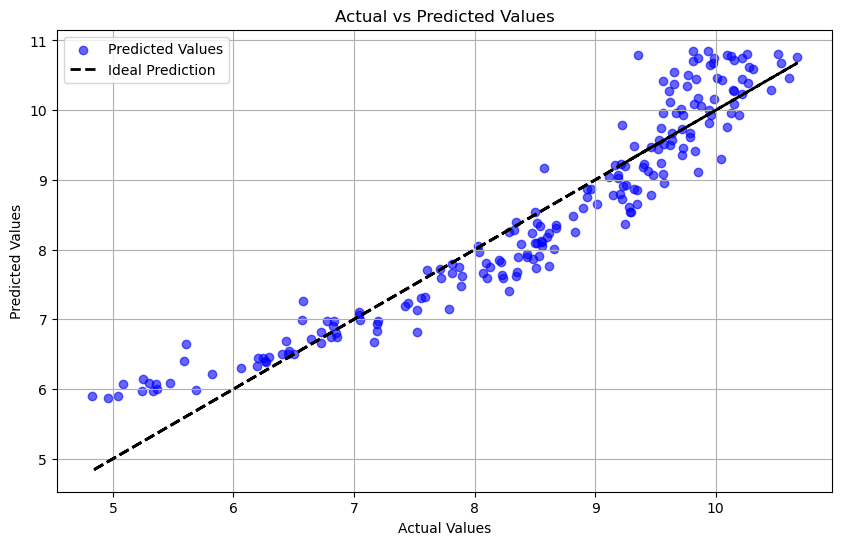

In [26]:
#Scores are really good. Lastly, lets plot it once for all 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Values')
plt.plot(y_test, y_test, 'k--', lw=2, label='Ideal Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show();